In [1]:
# 0.  Package to use
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
np.random.seed(3)

In [3]:
# User define history class define
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [4]:
# Trainging set & Test set
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [5]:
# Separate Training set &  Verification set
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [6]:
# Data set processing
x_train = x_train.reshape(50000,784).astype('float32') / 255.0
x_val = x_val.reshape(10000,784).astype('float32') / 255.0
x_test = x_test.reshape(10000,784).astype('float32') / 255.0

In [7]:
# Choose Trainin set & Verification set
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

In [8]:
# Label data One-hot encoding prcessing
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [9]:
# 2. Modeling
model = Sequential()
model.add(Dense(64, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
# 3. Model learning Process Setting
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead



순환신경망 모델인 경우는 fit 함수를 여러 번 호출하기 때문에 직접 콜백함수 만들어야함

In [11]:
# 4. Model learning 1000(range) x 1(epoch) 학습함 
custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
    print 'epochs : ' + str(epoch_idx)
    model.fit(x_train, y_train, nb_epoch=1, batch_size=32,
              validation_data=(x_val,y_val), callbacks=[custom_hist])

epochs : 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 700 samples, validate on 300 samples
Epoch 1/1


700/700 [==============================] - 0s - loss: 2.2395 - acc: 0.1600 - val_loss: 2.1642 - val_acc: 0.2100
epochs : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.0594 - acc: 0.3343 - val_loss: 2.0147 - val_acc: 0.3667
epochs : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.9099 - acc: 0.4743 - val_loss: 1.8806 - val_acc: 0.4867
epochs : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.7740 - acc: 0.5671 - val_loss: 1.7546 - val_acc: 0.5567
epochs : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6450 - acc: 0.6186 - val_loss: 1.6365 - val_acc: 0.6233
epochs :

700/700 [==============================] - 0s - loss: 0.3931 - acc: 0.9229 - val_loss: 0.5442 - val_acc: 0.8433
epochs : 41
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.3863 - acc: 0.9229 - val_loss: 0.5385 - val_acc: 0.8433
epochs : 42
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.3788 - acc: 0.9214 - val_loss: 0.5319 - val_acc: 0.8433
epochs : 43
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.3722 - acc: 0.9243 - val_loss: 0.5267 - val_acc: 0.8533
epochs : 44
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.3661 - acc: 0.9271 - val_loss: 0.5240 - val_acc: 0.8533
epochs : 45
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.3596 - acc: 0.9257 - val_loss: 0.5210 - val_

700/700 [==============================] - 0s - loss: 0.2063 - acc: 0.9643 - val_loss: 0.4571 - val_acc: 0.8633
epochs : 86
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.2037 - acc: 0.9686 - val_loss: 0.4582 - val_acc: 0.8600
epochs : 87
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.2016 - acc: 0.9671 - val_loss: 0.4557 - val_acc: 0.8600
epochs : 88
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.1988 - acc: 0.9700 - val_loss: 0.4578 - val_acc: 0.8667
epochs : 89
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.1966 - acc: 0.9700 - val_loss: 0.4567 - val_acc: 0.8633
epochs : 90
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.1945 - acc: 0.9686 - val_loss: 0.4563 - val_

700/700 [==============================] - 0s - loss: 0.1287 - acc: 0.9814 - val_loss: 0.4492 - val_acc: 0.8633
epochs : 131
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.1276 - acc: 0.9814 - val_loss: 0.4499 - val_acc: 0.8633
epochs : 132
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.1262 - acc: 0.9843 - val_loss: 0.4495 - val_acc: 0.8567
epochs : 133
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.1251 - acc: 0.9829 - val_loss: 0.4506 - val_acc: 0.8633
epochs : 134
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.1239 - acc: 0.9843 - val_loss: 0.4511 - val_acc: 0.8567
epochs : 135
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.1228 - acc: 0.9843 - val_loss: 0.4513 -

700/700 [==============================] - 0s - loss: 0.0874 - acc: 0.9886 - val_loss: 0.4560 - val_acc: 0.8600
epochs : 176
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0866 - acc: 0.9914 - val_loss: 0.4555 - val_acc: 0.8600
epochs : 177
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0861 - acc: 0.9900 - val_loss: 0.4569 - val_acc: 0.8600
epochs : 178
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0853 - acc: 0.9900 - val_loss: 0.4559 - val_acc: 0.8600
epochs : 179
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0846 - acc: 0.9914 - val_loss: 0.4552 - val_acc: 0.8600
epochs : 180
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0841 - acc: 0.9914 - val_loss: 0.4552 -

700/700 [==============================] - 0s - loss: 0.0632 - acc: 0.9957 - val_loss: 0.4646 - val_acc: 0.8667
epochs : 221
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0626 - acc: 0.9971 - val_loss: 0.4649 - val_acc: 0.8667
epochs : 222
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0622 - acc: 0.9971 - val_loss: 0.4648 - val_acc: 0.8667
epochs : 223
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0618 - acc: 0.9986 - val_loss: 0.4641 - val_acc: 0.8667
epochs : 224
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0615 - acc: 0.9971 - val_loss: 0.4648 - val_acc: 0.8667
epochs : 225
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0611 - acc: 0.9986 - val_loss: 0.4647 -

700/700 [==============================] - 0s - loss: 0.0479 - acc: 1.0000 - val_loss: 0.4719 - val_acc: 0.8667
epochs : 266
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0477 - acc: 1.0000 - val_loss: 0.4721 - val_acc: 0.8667
epochs : 267
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0474 - acc: 1.0000 - val_loss: 0.4731 - val_acc: 0.8667
epochs : 268
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0472 - acc: 1.0000 - val_loss: 0.4732 - val_acc: 0.8667
epochs : 269
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0469 - acc: 1.0000 - val_loss: 0.4735 - val_acc: 0.8667
epochs : 270
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0466 - acc: 1.0000 - val_loss: 0.4736 -

700/700 [==============================] - 0s - loss: 0.0380 - acc: 1.0000 - val_loss: 0.4793 - val_acc: 0.8667
epochs : 311
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0377 - acc: 1.0000 - val_loss: 0.4797 - val_acc: 0.8667
epochs : 312
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0375 - acc: 1.0000 - val_loss: 0.4801 - val_acc: 0.8667
epochs : 313
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0373 - acc: 1.0000 - val_loss: 0.4803 - val_acc: 0.8667
epochs : 314
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0372 - acc: 1.0000 - val_loss: 0.4804 - val_acc: 0.8667
epochs : 315
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0370 - acc: 1.0000 - val_loss: 0.4807 -

700/700 [==============================] - 0s - loss: 0.0309 - acc: 1.0000 - val_loss: 0.4874 - val_acc: 0.8667
epochs : 356
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0308 - acc: 1.0000 - val_loss: 0.4878 - val_acc: 0.8667
epochs : 357
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0307 - acc: 1.0000 - val_loss: 0.4875 - val_acc: 0.8667
epochs : 358
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0306 - acc: 1.0000 - val_loss: 0.4875 - val_acc: 0.8667
epochs : 359
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0304 - acc: 1.0000 - val_loss: 0.4878 - val_acc: 0.8667
epochs : 360
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0303 - acc: 1.0000 - val_loss: 0.4884 -

700/700 [==============================] - 0s - loss: 0.0258 - acc: 1.0000 - val_loss: 0.4946 - val_acc: 0.8667
epochs : 401
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0258 - acc: 1.0000 - val_loss: 0.4944 - val_acc: 0.8667
epochs : 402
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0257 - acc: 1.0000 - val_loss: 0.4946 - val_acc: 0.8667
epochs : 403
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0256 - acc: 1.0000 - val_loss: 0.4952 - val_acc: 0.8667
epochs : 404
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0255 - acc: 1.0000 - val_loss: 0.4954 - val_acc: 0.8667
epochs : 405
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0254 - acc: 1.0000 - val_loss: 0.4953 -

700/700 [==============================] - 0s - loss: 0.0220 - acc: 1.0000 - val_loss: 0.5013 - val_acc: 0.8667
epochs : 446
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0220 - acc: 1.0000 - val_loss: 0.5012 - val_acc: 0.8667
epochs : 447
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0219 - acc: 1.0000 - val_loss: 0.5016 - val_acc: 0.8667
epochs : 448
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0218 - acc: 1.0000 - val_loss: 0.5014 - val_acc: 0.8667
epochs : 449
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0218 - acc: 1.0000 - val_loss: 0.5015 - val_acc: 0.8667
epochs : 450
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0217 - acc: 1.0000 - val_loss: 0.5017 -

700/700 [==============================] - 0s - loss: 0.0191 - acc: 1.0000 - val_loss: 0.5077 - val_acc: 0.8667
epochs : 491
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0190 - acc: 1.0000 - val_loss: 0.5075 - val_acc: 0.8667
epochs : 492
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0190 - acc: 1.0000 - val_loss: 0.5077 - val_acc: 0.8667
epochs : 493
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0190 - acc: 1.0000 - val_loss: 0.5081 - val_acc: 0.8667
epochs : 494
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0189 - acc: 1.0000 - val_loss: 0.5082 - val_acc: 0.8667
epochs : 495
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0188 - acc: 1.0000 - val_loss: 0.5083 -

700/700 [==============================] - 0s - loss: 0.0168 - acc: 1.0000 - val_loss: 0.5131 - val_acc: 0.8667
epochs : 536
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0167 - acc: 1.0000 - val_loss: 0.5133 - val_acc: 0.8667
epochs : 537
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0167 - acc: 1.0000 - val_loss: 0.5135 - val_acc: 0.8667
epochs : 538
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0167 - acc: 1.0000 - val_loss: 0.5136 - val_acc: 0.8667
epochs : 539
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0166 - acc: 1.0000 - val_loss: 0.5136 - val_acc: 0.8667
epochs : 540
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0166 - acc: 1.0000 - val_loss: 0.5139 -

700/700 [==============================] - 0s - loss: 0.0149 - acc: 1.0000 - val_loss: 0.5187 - val_acc: 0.8667
epochs : 581
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0149 - acc: 1.0000 - val_loss: 0.5188 - val_acc: 0.8667
epochs : 582
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0149 - acc: 1.0000 - val_loss: 0.5191 - val_acc: 0.8667
epochs : 583
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0148 - acc: 1.0000 - val_loss: 0.5193 - val_acc: 0.8667
epochs : 584
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0148 - acc: 1.0000 - val_loss: 0.5195 - val_acc: 0.8667
epochs : 585
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0148 - acc: 1.0000 - val_loss: 0.5195 -

700/700 [==============================] - 0s - loss: 0.0134 - acc: 1.0000 - val_loss: 0.5239 - val_acc: 0.8633
epochs : 626
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0134 - acc: 1.0000 - val_loss: 0.5240 - val_acc: 0.8633
epochs : 627
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.5241 - val_acc: 0.8633
epochs : 628
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.5244 - val_acc: 0.8633
epochs : 629
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.5245 - val_acc: 0.8633
epochs : 630
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.5245 -

700/700 [==============================] - 0s - loss: 0.0121 - acc: 1.0000 - val_loss: 0.5289 - val_acc: 0.8633
epochs : 671
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0121 - acc: 1.0000 - val_loss: 0.5291 - val_acc: 0.8633
epochs : 672
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0121 - acc: 1.0000 - val_loss: 0.5292 - val_acc: 0.8633
epochs : 673
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0120 - acc: 1.0000 - val_loss: 0.5293 - val_acc: 0.8633
epochs : 674
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0120 - acc: 1.0000 - val_loss: 0.5294 - val_acc: 0.8633
epochs : 675
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0120 - acc: 1.0000 - val_loss: 0.5294 -

700/700 [==============================] - 0s - loss: 0.0111 - acc: 1.0000 - val_loss: 0.5333 - val_acc: 0.8633
epochs : 716
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0110 - acc: 1.0000 - val_loss: 0.5334 - val_acc: 0.8633
epochs : 717
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0110 - acc: 1.0000 - val_loss: 0.5335 - val_acc: 0.8633
epochs : 718
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0110 - acc: 1.0000 - val_loss: 0.5337 - val_acc: 0.8633
epochs : 719
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0110 - acc: 1.0000 - val_loss: 0.5338 - val_acc: 0.8633
epochs : 720
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0109 - acc: 1.0000 - val_loss: 0.5339 -

700/700 [==============================] - 0s - loss: 0.0101 - acc: 1.0000 - val_loss: 0.5376 - val_acc: 0.8633
epochs : 761
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0101 - acc: 1.0000 - val_loss: 0.5379 - val_acc: 0.8633
epochs : 762
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0101 - acc: 1.0000 - val_loss: 0.5380 - val_acc: 0.8633
epochs : 763
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0101 - acc: 1.0000 - val_loss: 0.5381 - val_acc: 0.8633
epochs : 764
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0101 - acc: 1.0000 - val_loss: 0.5381 - val_acc: 0.8633
epochs : 765
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0100 - acc: 1.0000 - val_loss: 0.5382 -

700/700 [==============================] - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.5420 - val_acc: 0.8633
epochs : 806
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.5420 - val_acc: 0.8633
epochs : 807
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.5421 - val_acc: 0.8633
epochs : 808
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.5422 - val_acc: 0.8633
epochs : 809
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.5423 - val_acc: 0.8633
epochs : 810
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0093 - acc: 1.0000 - val_loss: 0.5424 -

700/700 [==============================] - 0s - loss: 0.0087 - acc: 1.0000 - val_loss: 0.5461 - val_acc: 0.8633
epochs : 851
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.5461 - val_acc: 0.8633
epochs : 852
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.5461 - val_acc: 0.8633
epochs : 853
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.5463 - val_acc: 0.8633
epochs : 854
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.5464 - val_acc: 0.8633
epochs : 855
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.5465 -

700/700 [==============================] - 0s - loss: 0.0081 - acc: 1.0000 - val_loss: 0.5497 - val_acc: 0.8633
epochs : 896
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.5498 - val_acc: 0.8633
epochs : 897
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.5499 - val_acc: 0.8633
epochs : 898
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.5500 - val_acc: 0.8633
epochs : 899
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.5500 - val_acc: 0.8633
epochs : 900
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0080 - acc: 1.0000 - val_loss: 0.5501 -

700/700 [==============================] - 0s - loss: 0.0075 - acc: 1.0000 - val_loss: 0.5532 - val_acc: 0.8633
epochs : 941
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0075 - acc: 1.0000 - val_loss: 0.5533 - val_acc: 0.8633
epochs : 942
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0075 - acc: 1.0000 - val_loss: 0.5535 - val_acc: 0.8633
epochs : 943
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0075 - acc: 1.0000 - val_loss: 0.5535 - val_acc: 0.8633
epochs : 944
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0075 - acc: 1.0000 - val_loss: 0.5537 - val_acc: 0.8633
epochs : 945
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0075 - acc: 1.0000 - val_loss: 0.5538 -

700/700 [==============================] - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.5567 - val_acc: 0.8633
epochs : 986
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5568 - val_acc: 0.8633
epochs : 987
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5569 - val_acc: 0.8633
epochs : 988
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5570 - val_acc: 0.8633
epochs : 989
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5571 - val_acc: 0.8633
epochs : 990
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5571 -

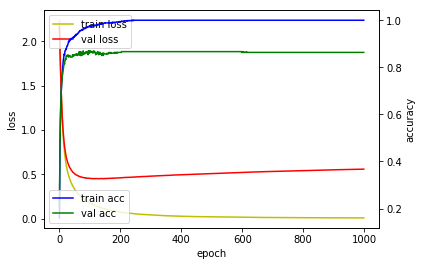

In [12]:
# 5. Looking learning processing(Have to use jupyter notebook)
%matplotlib inline
import matplotlib.pyplot as plt

loss_ax = plt.subplot()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss ,'y', label='train loss')
loss_ax.plot(custom_hist.val_loss,'r',label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()